# ROB 538 - Assignment #2

## Visual Plot of 5x10 Grid

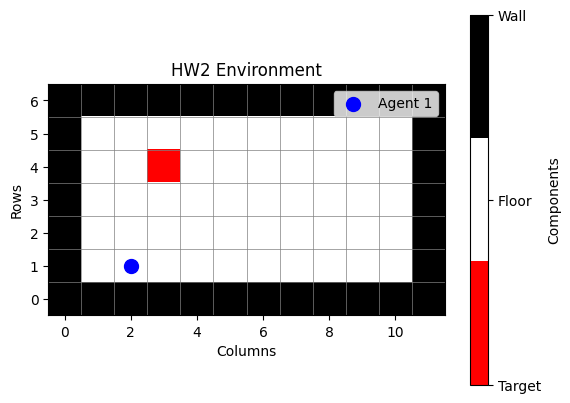

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

class Environment:
    def __init__(self):
        self.grid = np.zeros((7, 12))  # Initialize grid with zeros
        self.agents = dict()  # Dictionary to store agents and their positions
        self.targets = list()
        self.add_category()

    def add_category(self):
        # Mark the borders as walls (value 1)
        for i in range(np.shape(self.grid)[0]):
            for j in range(np.shape(self.grid)[1]):
                if (i == 0 or j == 0) or (i == 6 or j == 11):
                    self.grid[i][j] = 1  # Walls
                else:
                    self.grid[i][j] = 0  # Floor

    def add_targets(self, num):
        # Randomly add some targets
        for _ in range(num):
            x = np.random.randint(1, 6)
            y = np.random.randint(1, 11)
            self.targets.append((x, y))
            self.grid[x][y] = -1  # Mark target locations

    def add_agent(self, num):
        # Add an agent to the grid
        for _ in range(num):
            x = np.random.randint(1, 6)
            y = np.random.randint(1, 11)
            self.agents[str(num)] = (x, y)
    
    def display(self):
        # Define a custom colormap: 0 (floor) -> white, 1 (wall) -> black, -1 (target) -> red
        cmap = ListedColormap(['red', 'white', 'black'])
        
        # Create the plot for the grid
        img = plt.imshow(self.grid, cmap=cmap, interpolation='nearest', vmin=-1, vmax=1)
        
        # Add color bar with custom labels using FuncFormatter
        cbar = plt.colorbar(img, ticks=[-1, 0, 1])
        cbar.set_label('Components')
        cbar.ax.set_yticklabels(['Target', 'Floor', 'Wall'])

        plt.title('HW2 Environment')
        plt.gca().invert_yaxis()  # Invert the y-axis
        plt.xlabel('Columns')
        plt.ylabel('Rows')
        
        # Draw the agent (robot) on top of the grid in blue
        ax = plt.gca()
        for agentid, pos in self.agents.items():
            ax.scatter(pos[1], pos[0], color='blue', s=100, label='Agent 1')
    
        # Add grid lines for better visibility
        ax.set_xticks(np.arange(-0.5, 12, 1), minor=True)
        ax.set_yticks(np.arange(-0.5, 7, 1), minor=True)
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
        ax.tick_params(which='minor', size=0)
        
        # Display the legend and show the plot
        plt.legend(loc='best')
        plt.show()

# Create an environment instance and display it
env = Environment()
env.add_targets(1)
env.add_agent(1)
env.display()


## Part #1 - Single Agent & Target

In [2]:
class SimpleAgent:
    def __init__(self, environment):
        self.env = environment
        self.env.add_agent(1)
        self.env.add_targets(1)
        self.actions = 0

    def perceive(self):
        target_sensor = 0
        wall_sensor = 0

        r, c = self.env.agent['1']
        # Wall Sensor depend on direction as in front of vacuum will be different
        if (self.env.grid[r - 1][c] == 1):
            wall_sensor = 1
        if (self.env.grid[r + 1][c] == 1):
            wall_sensor = 1
        if (self.env.grid[r][c + 1] == 1):
            wall_sensor = 1
        if (self.env.grid[r][c - 1] == 1):
            wall_sensor = 1
        
        if self.env.grid[r][c] == -1:
            target_sensor = 1

        return wall_sensor, target_sensor

    def act(self, percept):
        wall_sensor, dirt_sensor = percept
        # Rules
        if dirt_sensor == 1:
            action = "suck"
        elif wall_sensor == 1:
            action = "turn-right"
        if wall_sensor == 0 and dirt_sensor == 0:
            action = "go-forward"
        self.actions += 1
        return action

    def update_position(self, action):
        r, c = self.env.agent_position

        if action == "go-forward":
            if self.env.agent_direction == 'up':
                self.env.agent_position = (r + 1 , c)
            elif self.env.agent_direction == 'right':
                self.env.agent_position = (r, c + 1)
            elif self.env.agent_direction == 'down':
                self.env.agent_position = (r - 1, c)
            elif self.env.agent_direction == 'left':
                self.env.agent_position = (r, c - 1)
        if action == "turn-right":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'up'
        if action == "turn-left":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'left'
        if action == "suck":
            self.env.grid[r][c] = -1  # Clean the dirt
        if action == 'done':
            self.env.agent_state = 'off'
            return
        
    def get_actions(self):
        return self.actions

# Create the agent
agent = SimpleAgent(env)

# Lists to store number of clean squares and actions
clean_counts = [env.get_clean()]
actions = [agent.get_actions()]

# Perform actions based on agent's percept
for e in range(50):  # Run for 50 steps
    percept = agent.perceive()
    action = agent.act(percept)
    agent.update_position(action)
    clean_counts.append(env.get_clean())
    actions.append(agent.get_actions())
plt.figure(1)
env.display()
# Initialize clean vs. action plot
plt.figure(2)
plt.plot(np.array(actions), np.array(clean_counts), marker='o', linestyle='-', markersize=3)
plt.xlabel('Actions')
plt.ylabel('Number of Clean Squares')
plt.title('Clean Squares vs Actions')
plt.grid(True)



AttributeError: 'Environment' object has no attribute 'get_clean'

## Agent #2 - Random Reflex Agent

In [ ]:
import random

class RandomReflexAgent:
    def __init__(self, environment):
        self.env = environment
        self.actions = 0

    def perceive(self):
        dirt_sensor = 0
        wall_sensor = 0
        home_sensor = 0

        r, c = self.env.agent_position
        # Wall Sensor depend on direction as in front of vacuum will be different
        if self.env.agent_direction == 'down' and (self.env.grid[r - 1][c] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'up' and (self.env.grid[r + 1][c] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'right' and (self.env.grid[r][c + 1] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'left' and (self.env.grid[r][c - 1] == 1):
            wall_sensor = 1
        
        if self.env.grid[r][c] == 0:
            dirt_sensor = 1
        if self.env.agent_position == (1, 1):
            home_sensor = 1 

        return wall_sensor, dirt_sensor, home_sensor

    def act(self, percept):
        wall_sensor, dirt_sensor, home_sensor = percept
        # Rules
        if dirt_sensor:  # if dirt is sensed, suck
            action = "suck"
        elif dirt_sensor == 0:
            actions = ["go-forward", "turn-right", "turn-left"]
            probabilities = [0.7, 0.15, 0.15]
            action = random.choices(actions, probabilities)[0]
            if action == "go-forward" and wall_sensor == 1:  # if wall in front, choose other actions
                action = random.choice(["turn-right", "turn-left"])
        self.actions += 1
        return action

    def update_position(self, action):
        r, c = self.env.agent_position

        if action == "go-forward":
            if self.env.agent_direction == 'up':
                self.env.agent_position = (r + 1 , c)
            elif self.env.agent_direction == 'right':
                self.env.agent_position = (r, c + 1)
            elif self.env.agent_direction == 'down':
                self.env.agent_position = (r - 1, c)
            elif self.env.agent_direction == 'left':
                self.env.agent_position = (r, c - 1)
        if action == "turn-right":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'up'
        if action == "turn-left":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'left'
        if action == "suck":
            self.env.grid[r][c] = -1  # Clean the dirt
        if action == 'done':
            self.env.agent_state = 'off'
            return
        
    def get_actions(self):
        return self.actions

# Lists to store number of clean squares and actions
clean_count = [env.get_clean()]
counts = list()
clean_counts = list()

# Perform actions based on agent's percept
for i in range(50):
    env = VacuumCleanerEnvironment()
    # Create the agent
    agent = RandomReflexAgent(env)
    for e in range(50):  # Run for 50 steps
        percept = agent.perceive()
        action = agent.act(percept)
        agent.update_position(action)
        clean_count.append(env.get_clean())
    plt.figure(1)
    env.display()
    counts.append(clean_count)

for j in range(50):
    sumC = 0  # Reset sumC for each iteration of the outer loop
    for i in range(50):
        sumC += counts[i][j]  # Sum the j-th element of each sublist
    clean_counts.append(sumC/50)  # Append the sum to the clean_counts list

actions = range(1, len(clean_counts)+1)

# Initialize clean vs. action plot
plt.figure(2)
plt.plot(np.array(actions), np.array(clean_counts), marker='o', linestyle='-', markersize=3)
plt.xlabel('Actions')
plt.ylabel('Number of Clean Squares')
plt.title('Clean Squares vs Actions')
plt.grid(True)

## Agent #3 - Model Based Reflex Agent

In [ ]:
class ModelBasedReflexAgent:
    def __init__(self, environment):
        self.env = environment
        self.actions = 0
        self.state = {'Direction': 0, 'Clean': 0}

    def perceive(self):
        dirt_sensor = 0
        wall_sensor = 0
        home_sensor = 0

        r, c = self.env.agent_position
        # Wall Sensor depend on direction as in front of vacuum will be different
        if self.env.agent_direction == 'down' and (self.env.grid[r - 1][c] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'up' and (self.env.grid[r + 1][c] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'right' and (self.env.grid[r][c + 1] == 1):
            wall_sensor = 1
        if self.env.agent_direction == 'left' and (self.env.grid[r][c - 1] == 1):
            wall_sensor = 1
        
        if self.env.grid[r][c] == 0:
            dirt_sensor = 1
        if self.env.agent_position == (1, 1):
            home_sensor = 1 

        return wall_sensor, dirt_sensor, home_sensor


    def act(self, percept):
        wall_sensor, dirt_sensor, home_sensor = percept
        if wall_sensor:
            action = self.handle_wall(percept)
            self.state['Direction'] = (self.state['Direction']+1)%2
        elif dirt_sensor:
            action = "suck"
        elif wall_sensor == 0:
            action = "go-forward"
        elif self.state['Clean']:
            action = "done"
        self.actions += 1
        return action
        
    def handle_wall(self, percept1):   
        D = self.state['Direction']
        if self.env.agent_position == (1,10):
            self.state['Clean'] == 1
            if percept1[1]:
                return "suck"
        elif D == 0:
            if percept1[1]:
                self.actions += 1
                self.update_position("suck")  
            self.actions += 1
            self.update_position("turn-right")
            percept4 = self.perceive()
            if percept4[0]:
                self.actions += 1
                self.update_position("turn-left")
            elif percept4[0] == 0:
                self.actions += 1
                self.update_position("go-forward")
            percept5 = self.perceive()
            if percept5[1]:
                self.actions += 1
                self.update_position("suck")
            self.actions += 1
            self.update_position("turn-right")
            percept6 = self.perceive()
            if percept6[0]:
                return "turn-right"
            elif percept6[0] == 0:
                return "go-forward"
        elif D == 1:
            if percept1[1]:
                self.actions += 1
                self.update_position("suck")  
            self.actions += 1
            self.update_position("turn-left")
            percept4 = self.perceive()
            if percept4[0]:
                self.actions += 1
                self.update_position("turn-right")
            elif percept4[0] == 0:
                self.actions += 1
                self.update_position("go-forward")
            percept5 = self.perceive()
            if percept5[1]:
                self.actions += 1
                self.update_position("suck")
            self.actions += 1
            self.update_position("turn-left")
            percept6 = self.perceive()
            if percept6[0]:
                return "turn-left"
            elif percept6[0] == 0:
                return "go-forward"

    def update_position(self, action):
        r, c = self.env.agent_position

        if action == "go-forward":
            if self.env.agent_direction == 'up':
                self.env.agent_position = (r + 1 , c)
            elif self.env.agent_direction == 'right':
                self.env.agent_position = (r, c + 1)
            elif self.env.agent_direction == 'down':
                self.env.agent_position = (r - 1, c)
            elif self.env.agent_direction == 'left':
                self.env.agent_position = (r, c - 1)
        if action == "turn-right":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'up'
        if action == "turn-left":
            if self.env.agent_direction == 'up':
                self.env.agent_direction = 'left'
            elif self.env.agent_direction == 'left':
                self.env.agent_direction = 'down'
            elif self.env.agent_direction == 'down':
                self.env.agent_direction = 'right'
            elif self.env.agent_direction == 'right':
                self.env.agent_direction = 'up'
        if action == "suck":
            self.env.grid[r][c] = -1  # Clean the dirt
        if action is None:
            return
        if action == 'done':
            self.env.agent_state = 'off'
            return
        
    def get_actions(self):
        return self.actions

# Create the agent
agent = ModelBasedReflexAgent(env)

# Lists to store number of clean squares and actions
clean_counts = [env.get_clean()]
actions = [agent.get_actions()]



# Perform actions based on agent's percept
while agent.get_actions() <= 50:  # Run for 50 steps
    percept = agent.perceive()
    action = agent.act(percept)
    agent.update_position(action)
    clean_counts.append(env.get_clean())
    actions.append(agent.get_actions())
plt.figure(1)
env.display()
# Initialize clean vs. action plot
plt.figure(2)
plt.plot(np.array(actions), np.array(clean_counts), marker='o', linestyle='-', markersize=3)
plt.xlabel('Actions')
plt.ylabel('Number of Clean Squares')
plt.title('Clean Squares vs Actions')
plt.grid(True)

